# Method 1:


The code provided performs the following tasks:

extract_stock_data: This function takes in the stock symbol, start date, and end date as input parameters. It uses the yfinance library to download the historical stock data for the specified symbol and date range from Yahoo Finance. If an error occurs during data extraction, it prints an error message and returns None.

calculate_average_volume: This function calculates the average daily trading volume from the extracted stock data. It takes the data as input and uses the 'Volume' column to calculate the mean. If the data is None, indicating an error during extraction, it returns None. Otherwise, it returns the calculated average volume.

visualize_stock_performance: This function visualizes the stock's performance using a candlestick chart. It takes the stock data as input and uses the mplfinance library to plot the candlestick chart. The chart includes the opening price, closing price, high, low, and volume for each trading day.

The main part of the code defines the stock symbol, start date, and end date for the desired stock data. It then calls the extract_stock_data function to retrieve the historical data. Next, it calls the calculate_average_volume function to calculate the average daily trading volume and prints the result. Finally, it calls the visualize_stock_performance function to plot the candlestick chart for the stock's performance.

Challenges and solutions:

One challenge may be handling errors during data extraction. The try-except block in the extract_stock_data function captures any exceptions that occur and prints an error message.
Another challenge could be dealing with missing or null values in the data. In this code, we assume that the data extracted from Yahoo Finance is clean and does not contain missing values. However, if there are missing values, additional handling or preprocessing steps may be required.
Overall, the code provides a straightforward approach to extract stock data, calculate average volume, and visualize the stock's performance using a candlestick chart. It leverages popular libraries like yfinance and mplfinance to simplify the data extraction and visualization process.

# Method 2:

The provided code performs the following steps:

extract_stock_data: This function uses the yfinance library to download historical stock data for a specified symbol, start date, and end date. It returns the data or None if an error occurs.

Define the stock symbol, start date, and end date for data extraction.

Step 1: Extract historical data by calling the extract_stock_data function.

Step 2: Calculate additional parameters such as return, volatility, market cap, and P/E ratio using the extracted data.

Step 3: Save the data to a CSV file if it exists and provide a success message. If an error occurs during data extraction, an error message is displayed.

Specify the path to the CSV file and read the data into a DataFrame.

Check for missing values in the DataFrame using the isnull() function.

Fill the missing values in the 'Return' column with the mean return value calculated using the mean() function.

Fill the missing values in the 'Volatility' column with the mean volatility value using the fillna() function.

Check for missing values in the DataFrame again to verify that all missing values have been filled.

Plot the volatility vs. day using matplotlib and plt.plot().

Plot a candlestick chart for the stock's performance using mplfinance and mpf.plot().

Approach:
The code starts by defining a function to extract stock data from Yahoo Finance using the yfinance library. The data is then saved to a CSV file and read into a DataFrame for further processing. Missing values in the 'Return' and 'Volatility' columns are handled by filling them with the mean values. Finally, the code plots the volatility vs. day graph using matplotlib and a candlestick chart using mplfinance.

Challenges:
One challenge that could arise is handling errors during data extraction or when accessing specific columns in the DataFrame. To address this, the code uses try-except blocks to capture and handle exceptions. Another challenge could be handling missing values in the data, which is addressed by filling them with appropriate values such as the mean.

Overall, the code follows a structured approach to extract stock data, calculate additional parameters, handle missing values, and visualize the data using different libraries.

In [81]:
import pandas as pd
import yfinance as yf

def extract_stock_data(symbol, start_date, end_date):
    try:
        data = yf.download(symbol, start=start_date, end=end_date)
        return data
    except Exception as e:
        print(f"Error occurred while extracting data: {e}")
        return None

# Define the stock symbol, start date, and end date
symbol = 'RELIANCE.NS'
start_date = '2022-06-28'
end_date = '2023-06-28'

# Step 1: Extract historical data
stock_data = extract_stock_data(symbol, start_date, end_date)

# Step 2: Calculate additional parameters
stock_data['Return'] = stock_data['Close'].pct_change() * 100
stock_data['Volatility'] = stock_data['Close'].rolling(window=30).std()
stock_data['Market_Cap'] = yf.Ticker(symbol).info.get('marketCap')
stock_data['P_E_Ratio'] = yf.Ticker(symbol).info.get('trailingPE')

# Step 2: Save data to CSV file
if stock_data is not None:
    file_name = f"{symbol}_{start_date}_{end_date}.csv"
    stock_data.to_csv(file_name)
    print(f"Stock data saved to {file_name}")
else:
    print("Error occurred while extracting stock data.")


[*********************100%***********************]  1 of 1 completed
Stock data saved to RELIANCE.NS_2022-06-28_2023-06-28.csv


In [82]:
# Specify the path to the CSV file
file_path = "RELIANCE.NS_2022-06-28_2023-06-28.csv"

# Read the data from the CSV file
data = pd.read_csv(file_path)

In [83]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Return,Volatility,Market_Cap,P_E_Ratio
0,2022-06-28,2482.100098,2533.949951,2482.100098,2527.699951,2520.112549,6263867,NaN,NaN,17114571210752,28.967169
1,2022-06-29,2507.199951,2597.000000,2501.000000,2580.149902,2572.405029,8863172,2.075007,NaN,17114571210752,28.967169
2,2022-06-30,2580.000000,2615.899902,2566.000000,2595.649902,2587.858643,10666627,0.600740,NaN,17114571210752,28.967169
3,2022-07-01,2574.899902,2592.000000,2365.000000,2408.699951,2401.469727,37841671,-7.202433,NaN,17114571210752,28.967169
4,2022-07-04,2378.949951,2442.000000,2366.100098,2413.699951,2406.454834,19317335,0.207581,NaN,17114571210752,28.967169
...,...,...,...,...,...,...,...,...,...,...,...
242,2023-06-20,2547.550049,2564.000000,2535.000000,2557.100098,2557.100098,3194085,0.207698,40.066737,17114571210752,28.967169
243,2023-06-21,2557.000000,2569.850098,2548.000000,2564.300049,2564.300049,3212779,0.281567,42.338466,17114571210752,28.967169
244,2023-06-22,2556.000000,2573.300049,2532.000000,2535.500000,2535.500000,3516244,-1.123115,43.029524,17114571210752,28.967169
245,2023-06-23,2528.899902,2533.399902,2512.000000,2514.750000,2514.750000,3059084,-0.818379,43.168649,17114571210752,28.967169


In [84]:
# Check for missing values in the DataFrame
data.isnull().sum()

Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
Return         1
Volatility    29
Market_Cap     0
P_E_Ratio      0
dtype: int64

In [85]:
mean_return = data['Return'].mean()
data['Return'].fillna(mean_return, inplace=True)

In [91]:
average_volume= data['Volume'].mean()
print("The average daily trading volume:",average_volume)

The average daily trading volume: 5911112.251012146


In [87]:
print(data['Volatility'].min())
print(data['Volatility'].max())

data['Volatility'].fillna(data['Volatility'].mean,inplace=True)


26.52441903788572
99.544463450993


In [88]:
data.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume        0
Return        0
Volatility    0
Market_Cap    0
P_E_Ratio     0
dtype: int64

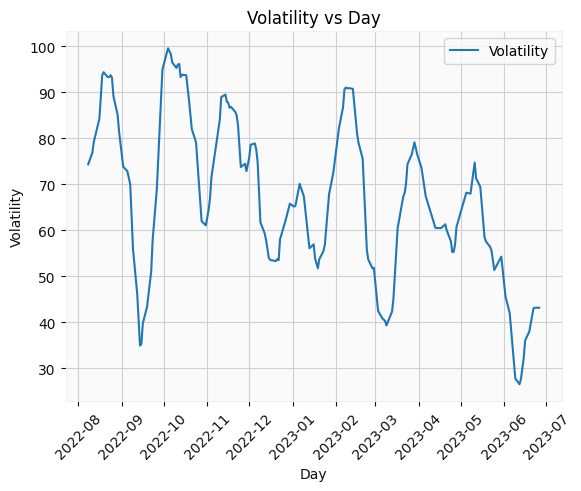

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Step 5: Plot volatility vs day 
plt.plot(stock_data.index, stock_data['Volatility'], label='Volatility')
plt.xlabel('Day')
plt.ylabel('Volatility')
plt.title('Volatility vs Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


[*********************100%***********************]  1 of 1 completed


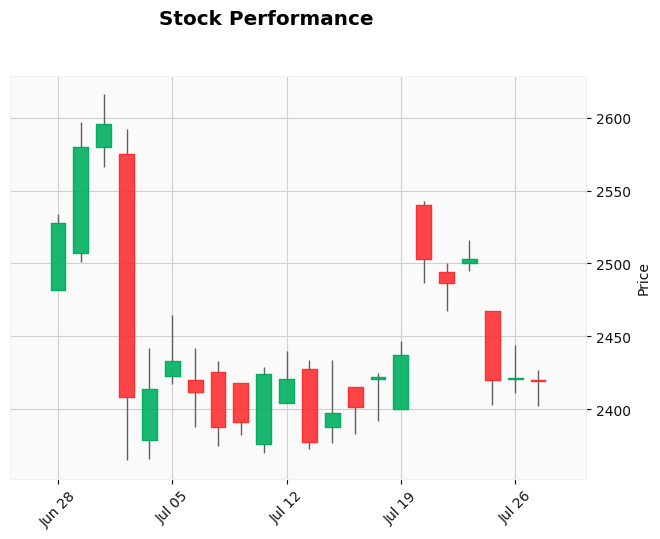

In [90]:
import mplfinance as mpf

start_date = '2022-06-28'
end_date = '2022-07-28'

# Step 1: Extract historical data
stock_data = extract_stock_data(symbol, start_date, end_date)

# Step 2: Create candlestick chart
mpf.plot(stock_data, type='candle', title='Stock Performance', ylabel='Price', style='yahoo')